<font color='orange'><h1><center>Case Study: Telecom Churn</center></h1></font>

## PROBLEM STATEMENT

<p style="font-family: Arial; font-size:1.0em;color:blue;">  
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
<br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
<br>
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## IMPORTING DATA

In [1]:
# Supress the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set maximum rows to display = 500.
pd.set_option('display.max_rows', 500)

In [4]:
# Read the dataset.
telecom = pd.read_csv('telecom_churn_data.csv')

## UNDERSTANDING DATA

In [5]:
# Look at the head of the dataframe.
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# Shape of the dataframe.
telecom.shape

(99999, 226)

In [7]:
# Info of the dataframe.
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
# Summary statistics of the dataframe.
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## FILTERING HIGH VALUE CUSTOMERS

<p style="font-family: Arial; font-size:1.0em;color:blue;">  
    First and foremost, let's filter the high value customers.
<br>
High-value customers are defined as follows: 
<br>
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
<br>
After filtering the high-value customers, we should get about 29.9k rows.

In [9]:
# Calculate the total recharge amount for data.
telecom['total_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

In [10]:
# Calculate the total recharge amount (calling + data)
telecom['total_rech_6'] = telecom[['total_rech_amt_6','total_rech_amt_data_6']].sum(axis = 1)
telecom['total_rech_7'] = telecom[['total_rech_amt_7','total_rech_amt_data_7']].sum(axis = 1)

In [11]:
# Calculate the average of the total recharge amount.
telecom['Average_total_rech_amt'] = telecom[['total_rech_6','total_rech_7']].mean(axis = 1)

# Look at the average of the total recharge amount column.
telecom['Average_total_rech_amt'].head(5)

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: Average_total_rech_amt, dtype: float64

In [12]:
# Calculate the 70th percentile value.
threshold_avg = telecom['Average_total_rech_amt'].quantile(0.70)

In [13]:
# Pick the rows which are greater than the threshold.
telecom = telecom[telecom['Average_total_rech_amt'] > threshold_avg]

# Look at the shape of the dataframe.
telecom.shape

(29953, 231)

<p style="font-family: Arial; font-size:1.0em;color:blue;">  
<b>OBSERVATION:</b><br>
<br>
We have 29.9k rows of high value customers!
<br>
Let's drop the intermediate columns that are created.

In [14]:
# Drop the intermediate columns.
telecom.drop(['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_6',
              'total_rech_7', 'Average_total_rech_amt'], inplace=True, axis=1)

# Look at the shape of the dataframe.
telecom.shape

(29953, 226)

## TAG CHURNERS

<p style="font-family: Arial; font-size:1.0em;color:blue;">  
Now, let's tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
<br>
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
<br>
The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9
<br>
<br>
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [15]:
# Churners -> No calls (IC or OC) and No internet (2g or 3g)
telecom['churn'] = np.where(
                            ((telecom['total_ic_mou_9'] == 0.00) | (telecom['total_og_mou_9'] == 0.00))
                            & ((telecom['vol_2g_mb_9'] == 0.00) | (telecom['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

# Look at the churn column.
telecom['churn']

0        1
7        1
8        0
21       0
23       0
        ..
99981    0
99984    0
99986    0
99988    0
99997    0
Name: churn, Length: 29953, dtype: int32

In [16]:
# Change the dtype of 'churn' to object.
telecom.churn = telecom.churn.astype('object')

# Look at the dtype to confirm.
telecom.churn.dtype

dtype('O')

## DROP ALL FEATURES CORRESPONDING TO 9TH MONTH

In [17]:
# Let's import the required libraries.
import re

# Get the features of 9th month.
columns_to_drop_9 = [col for col in telecom.columns if (re.compile("_9").search(col) or re.compile("sep").search(col))]
columns_to_drop_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [18]:
# Drop the columns of 9th month.
telecom.drop(columns_to_drop_9, axis = 1, inplace = True)

# Look at the shape of the dataframe.
telecom.shape

(29953, 172)

## DATA CLEANING

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>METHODOLOGY:</b><br><br>
- Check and drop duplicates in the data if any.<br>
- Drop irrelevant columns that are not required in the analysis.<br>
- Handle missing values.<br>
    - Drop the columns with single/unique values.<br>
    - Replace meaningful missing values in the data.<br>
    - Drop the rows with negative arpu values.<br>
- Change the column dtypes if required.<br>

In [19]:
# Let's check for the duplicates in the data.
telecom.loc[telecom.duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn


<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
There are no duplicates in the data!

In [20]:
# Drop the 'mobile_number' column, since it is not required in our analysis.
telecom.drop('mobile_number', axis=1, inplace=True)

# Look at the head of the dataframe.
telecom.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,...,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,...,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,...,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,...,0,0,NaN,NaN,NaN,720,0.00,0.00,0.00,0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,...,0,1,NaN,1.0,1.0,604,40.45,51.86,0.00,0


In [21]:
# Get the column-wise null values.
(telecom.isnull().mean()*100).round(2).sort_values(ascending=False)

count_rech_2g_8             46.80
total_rech_data_8           46.80
night_pck_user_8            46.80
count_rech_3g_8             46.80
arpu_3g_8                   46.80
max_rech_data_8             46.80
arpu_2g_8                   46.80
fb_user_8                   46.80
date_of_last_rech_data_8    46.80
av_rech_amt_data_8          46.80
fb_user_6                   44.11
total_rech_data_6           44.11
arpu_3g_6                   44.11
night_pck_user_6            44.11
av_rech_amt_data_6          44.11
count_rech_2g_6             44.11
arpu_2g_6                   44.11
count_rech_3g_6             44.11
date_of_last_rech_data_6    44.11
max_rech_data_6             44.11
av_rech_amt_data_7          43.12
arpu_2g_7                   43.12
arpu_3g_7                   43.12
night_pck_user_7            43.12
count_rech_3g_7             43.12
count_rech_2g_7             43.12
max_rech_data_7             43.12
total_rech_data_7           43.12
fb_user_7                   43.12
date_of_last_r

In [22]:
# Let's identify features with single or unique columns.
unique_value_columns = telecom.columns[telecom.nunique() == 1]
unique_value_columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [23]:
# Let's drop the columns with unique values.
telecom.drop(unique_value_columns, axis = 1, inplace = True)

# Look at the shape of the dataframe.
telecom.shape

(29953, 158)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
By looking at the missing value percentages, the column 'date_of_last_rech_data_8' and other features of 8th month like ['total_rech_data_8', 'arpu_2g_8', 'max_rech_data_8', 'count_rech_2g_8', 'arpu_3g_8', 'count_rech_3g_8', 'night_pck_user_8', 'fb_user_8', 'av_rech_amt_data_8'] have the same percentages.<br>
Let's look at the rows with missing values.

In [24]:
# Get the high missing features of 8th month.
features_high_missing_8 = ['date_of_last_rech_data_8','total_rech_data_8', 'arpu_2g_8', 'max_rech_data_8','count_rech_2g_8', 
                           'arpu_3g_8', 'count_rech_3g_8', 'night_pck_user_8', 'fb_user_8','av_rech_amt_data_8']

# Look at the rows with missing values.
telecom[features_high_missing_8][telecom['date_of_last_rech_data_8'].isnull()]

,date_of_last_rech_data_8,total_rech_data_8,arpu_2g_8,max_rech_data_8,count_rech_2g_8,arpu_3g_8,count_rech_3g_8,night_pck_user_8,fb_user_8,av_rech_amt_data_8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
It is clearly evident that whenever there is no last recharge, i.e., 'date_of_last_rech_data_8' is null, other related features are also null. 
<br>
Hence, we can fill these fields with '0'.
<br>
This is the same behaviour with high missing value columns of 6th and 7th months, also.

In [25]:
# Get the high missing value columns.
high_missing_value_columns = telecom.columns[telecom.isnull().mean() * 100 > 40]
high_missing_value_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [26]:
# Let's separate the date columns from the high missing value columns.
date_columns = high_missing_value_columns[:3] 
other_columns = high_missing_value_columns[3:]

print(date_columns)
print(other_columns)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


In [27]:
# Let's drop the date columns.
telecom.drop(date_columns, axis = 1, inplace = True)

# Get the shape of the dataframe.
telecom.shape

(29953, 155)

In [28]:
# Let's fill the missing fields in high missing values columns with 0.
telecom[other_columns] = telecom[other_columns].fillna(0)

In [29]:
# Again, get the column-wise null values. (ignore columns with no missing values.)
telecom[telecom.columns[telecom.isnull().mean() > 0]].isnull().mean().sort_values(ascending = False) * 100

isd_og_mou_8           3.912797
loc_og_mou_8           3.912797
loc_ic_t2t_mou_8       3.912797
loc_ic_mou_8           3.912797
og_others_8            3.912797
spl_og_mou_8           3.912797
std_ic_t2t_mou_8       3.912797
std_og_mou_8           3.912797
std_og_t2f_mou_8       3.912797
std_ic_t2m_mou_8       3.912797
std_og_t2m_mou_8       3.912797
std_og_t2t_mou_8       3.912797
std_ic_t2f_mou_8       3.912797
loc_og_t2c_mou_8       3.912797
loc_ic_t2f_mou_8       3.912797
std_ic_mou_8           3.912797
loc_og_t2f_mou_8       3.912797
loc_og_t2m_mou_8       3.912797
spl_ic_mou_8           3.912797
loc_og_t2t_mou_8       3.912797
roam_og_mou_8          3.912797
isd_ic_mou_8           3.912797
roam_ic_mou_8          3.912797
offnet_mou_8           3.912797
ic_others_8            3.912797
onnet_mou_8            3.912797
loc_ic_t2m_mou_8       3.912797
date_of_last_rech_8    1.943044
std_og_t2t_mou_6       1.809502
std_og_mou_6           1.809502
std_ic_t2f_mou_6       1.809502
std_og_t

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br>
<br>The high missing value columns are successfully imputed with '0'
<br>
Let's drop the date columns, if any.

In [30]:
# Drop the remaining date columns.
telecom.drop(['date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6'], axis = 1,inplace = True)

# Get the shape of the dataframe.
telecom.shape

(29953, 152)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
For a prepaid customer, negative value of 'arpu' is not expected.
<br>
Let's drop the rows with negative 'arpu' values.

In [31]:
# Let's drop the rows with negative 'arpu' since 'arpu' for a prepaid customer cannot be negative.
telecom = telecom.loc[(telecom.arpu_6 >= 0) & (telecom.arpu_7 >= 0) & (telecom.arpu_8 >= 0) & 
                      (telecom.arpu_2g_6 >= 0) & (telecom.arpu_2g_7 >= 0) & (telecom.arpu_2g_8 >= 0) & 
                      (telecom.arpu_3g_6 >= 0) & (telecom.arpu_3g_7 >= 0) & (telecom.arpu_3g_8>=0)]

# Get the shape of the dataframe.
telecom.shape

(28532, 152)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
Let's impute the remaining low missing value columns using KNN Imputer

In [32]:
# Import the required library.
from sklearn.impute import KNNImputer

# Create the KNNImputer object
imputer = KNNImputer(n_neighbors = 5)

# Fit and transform.
imputed_df = imputer.fit_transform(telecom)

In [33]:
# Convert into Dataframe.
telecom = pd.DataFrame(imputed_df, columns = telecom.columns)

# Look at the head of the dataframe.
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.385,214.816,213.803,7.146,2.11,0.00,52.164,32.606,0.00,0.00,...,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.180,1349.850,3171.480,57.840,54.68,52.29,453.430,567.160,325.91,16.23,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
2,378.721,492.223,137.362,413.690,351.03,35.08,94.660,80.630,136.48,0.00,...,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
3,514.453,597.753,637.760,102.410,132.11,85.14,757.930,896.680,983.39,0.00,...,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0
4,74.350,193.897,366.966,48.960,50.66,33.58,85.410,89.360,205.89,0.00,...,0.0,1.0,0.0,1.0,1.0,604.0,40.45,51.86,0.00,0.0


In [34]:
# Finally, get the column-wise null values. (ignore columns with no missing values.)
telecom[telecom.columns[telecom.isnull().mean() > 0]].isnull().mean().sort_values(ascending = False) * 100

Series([], dtype: float64)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br> All the missing values are handled.

## EXPLORATORY DATA ANALYSIS

In [35]:
# Let's look at the head of the dataframe.
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.385,214.816,213.803,7.146,2.11,0.00,52.164,32.606,0.00,0.00,...,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.180,1349.850,3171.480,57.840,54.68,52.29,453.430,567.160,325.91,16.23,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
2,378.721,492.223,137.362,413.690,351.03,35.08,94.660,80.630,136.48,0.00,...,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
3,514.453,597.753,637.760,102.410,132.11,85.14,757.930,896.680,983.39,0.00,...,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0
4,74.350,193.897,366.966,48.960,50.66,33.58,85.410,89.360,205.89,0.00,...,0.0,1.0,0.0,1.0,1.0,604.0,40.45,51.86,0.00,0.0


## TARGET VARIABLE

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
    Let's do some analysis on the target variable

In [36]:
# Calculate the churn rate.
telecom['churn'].value_counts(normalize=True)*100

0.0    89.278705
1.0    10.721295
Name: churn, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

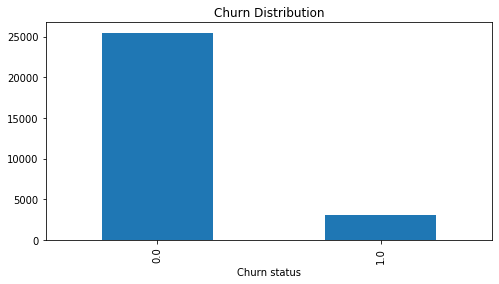

In [37]:
# Let's look at the churn distribution.
plt.figure(figsize=(8,4))
telecom['churn'].value_counts().plot(kind = 'bar')
plt.xlabel('Churn status')
plt.title('Churn Distribution')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b>
<br>
<br>
There is a huge imbalance in the data. We shall use some data balancing techniques during modelling

In [38]:
# Let's create a function for performing exploratory data analysis.
def ExploratoryAnalysis(feature_name):
    
    # Derive individual feature names for each month.
    month_6 = feature_name + '_6'
    month_7 = feature_name + '_7'
    month_8 = feature_name + '_8'
    
    # Heat map between the numeric attributes to look for correlation.
    plt.figure(figsize=(6,6))
    sns.heatmap(telecom[[month_6, month_7, month_8]].corr(), annot = True, cmap="YlGnBu")

    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    
    # Pair plot
    sns.pairplot(data=telecom[[month_6, month_7, month_8, 'churn']], hue='churn')
    
    # Dist plot
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    ax = sns.distplot(telecom[telecom['churn']==1][month_6], bins = 30, ax = axes[0,0], kde = False)
    ax.set_title('Churn')
    ax = sns.distplot(telecom[telecom['churn']==0][month_6], bins = 30, ax = axes[0,1], kde = False)
    ax.set_title('Non-Churn')
    ax = sns.distplot(telecom[telecom['churn']==1][month_7], bins = 30, ax = axes[1,0], kde = False)
    ax = sns.distplot(telecom[telecom['churn']==0][month_7], bins = 30, ax = axes[1,1], kde = False)
    ax = sns.distplot(telecom[telecom['churn']==1][month_8], bins = 30, ax = axes[2,0], kde = False)
    ax = sns.distplot(telecom[telecom['churn']==0][month_8], bins = 30, ax = axes[2,1], kde = False)
    plt.show()

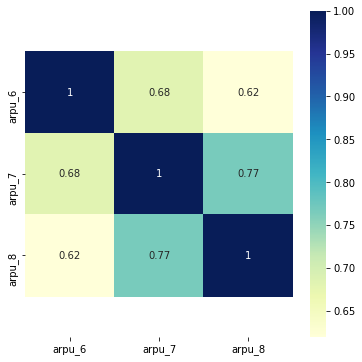

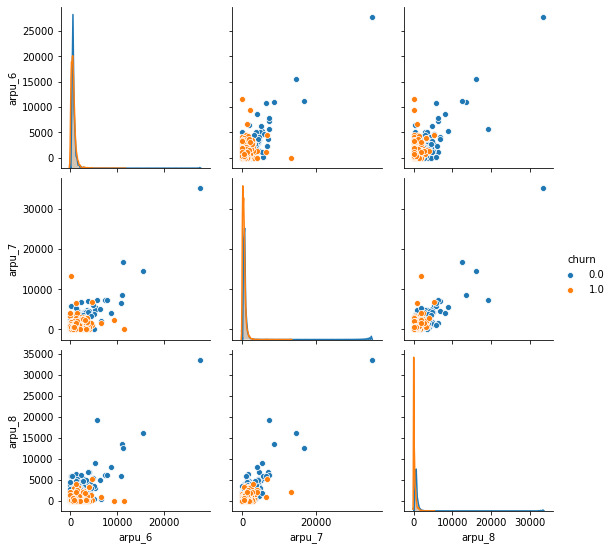

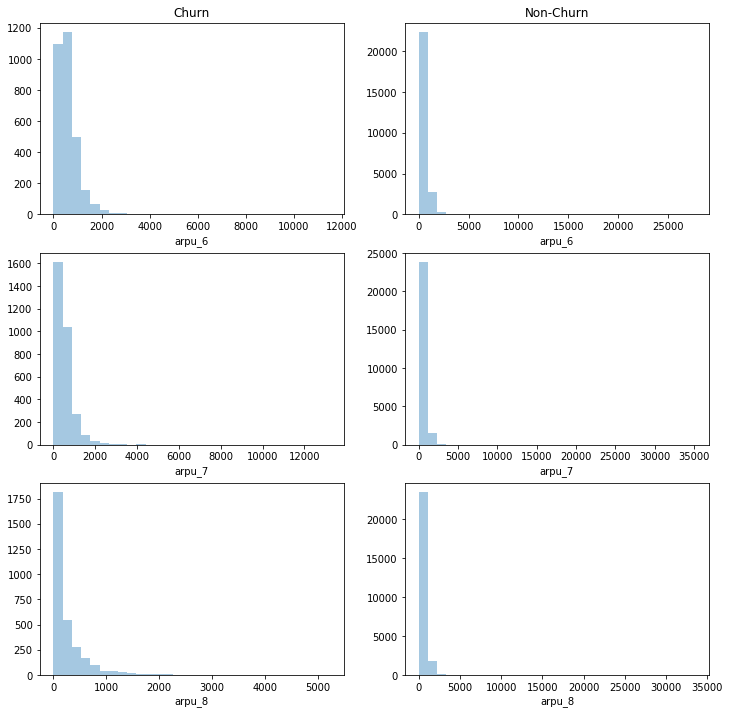

In [39]:
# arpu (Average Revenue per user)
ExploratoryAnalysis('arpu')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'arpu_6', 'arpu_7' and 'arpu_8' are positively correlated with each other.<br>
- The 'arpu' values of Non-churners are usually very high compared to churners in the respective month.

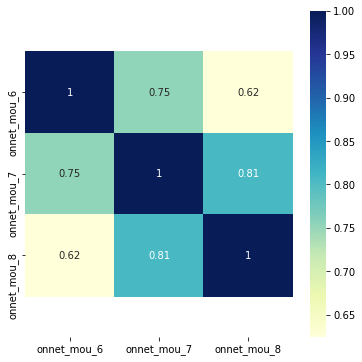

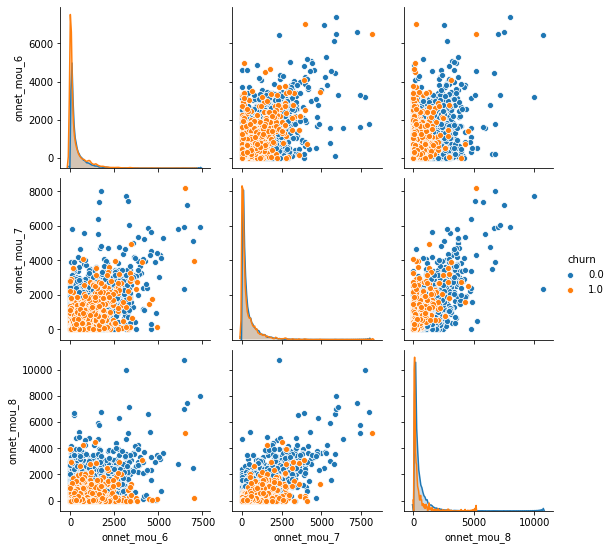

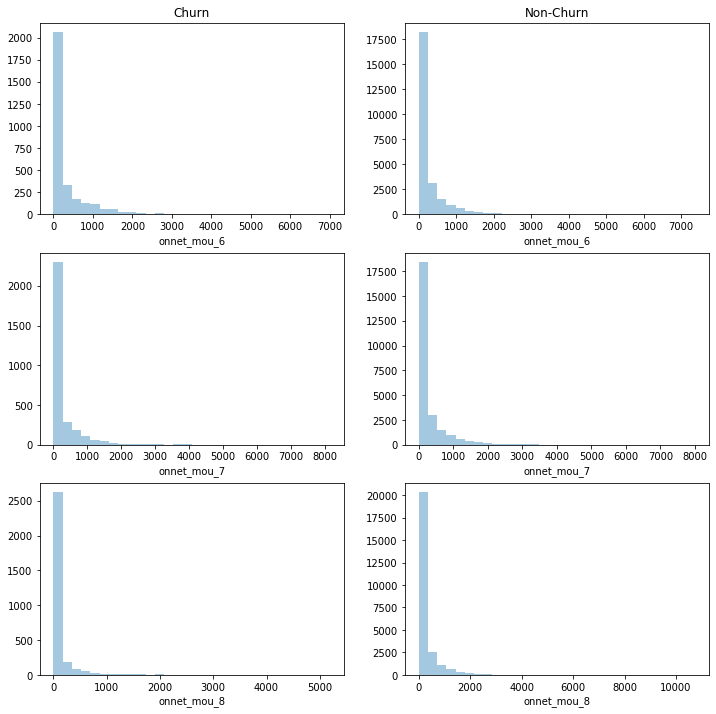

In [40]:
# onnet_mou (All kind of calls within the same operator network - Minutes of usage - voice calls)
ExploratoryAnalysis('onnet_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'onnet_mou_7' and 'onnet_mou_8' are strongly and positively correlated with each other.<br>
- The 'onnet_mou' values of Non-churners are usually very high compared to churners in the respective month.

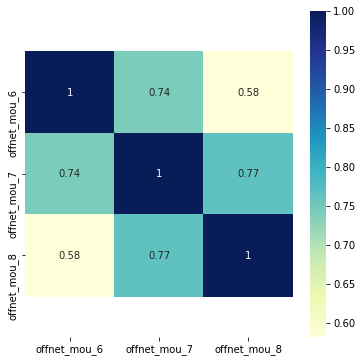

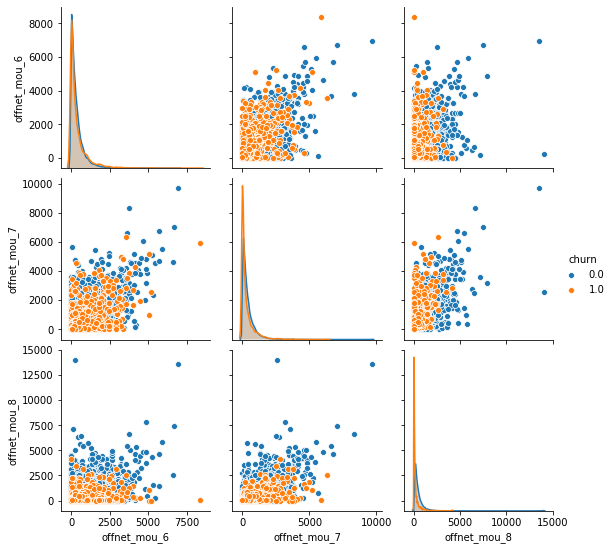

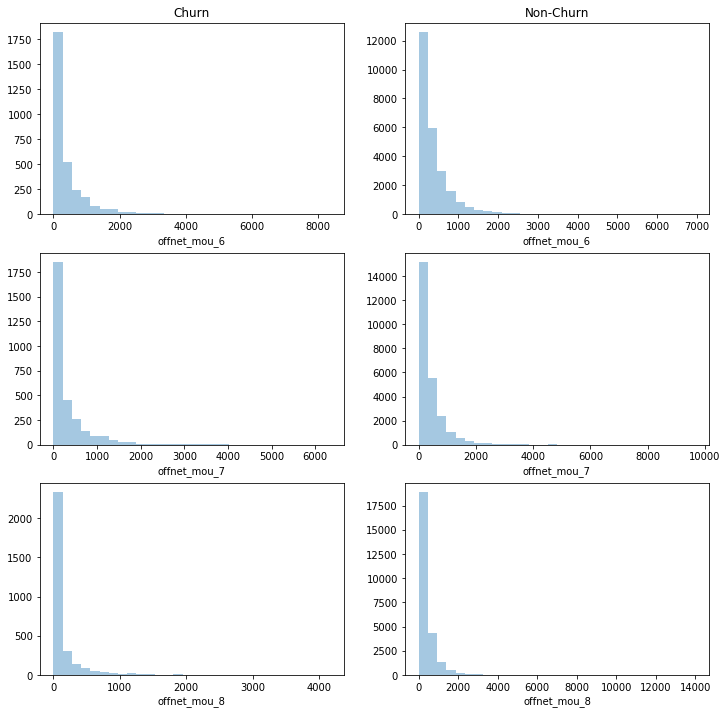

In [41]:
# offnet_mou (All kind of calls outside the operator T network - Minutes of usage - voice calls)
ExploratoryAnalysis('offnet_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'offnet_mou_7' and 'offnet_mou_8' are strongly and positively correlated with each other.<br>
- The 'offnet_mou' values of Non-churners are usually very high compared to churners in the respective month.

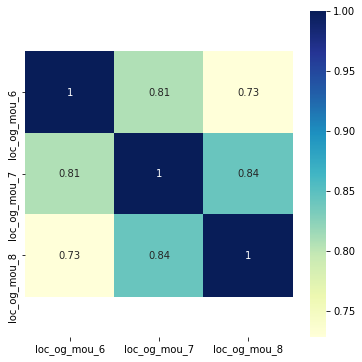

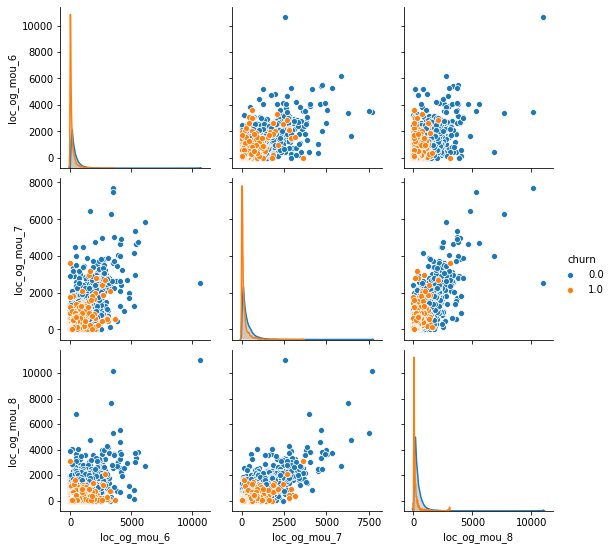

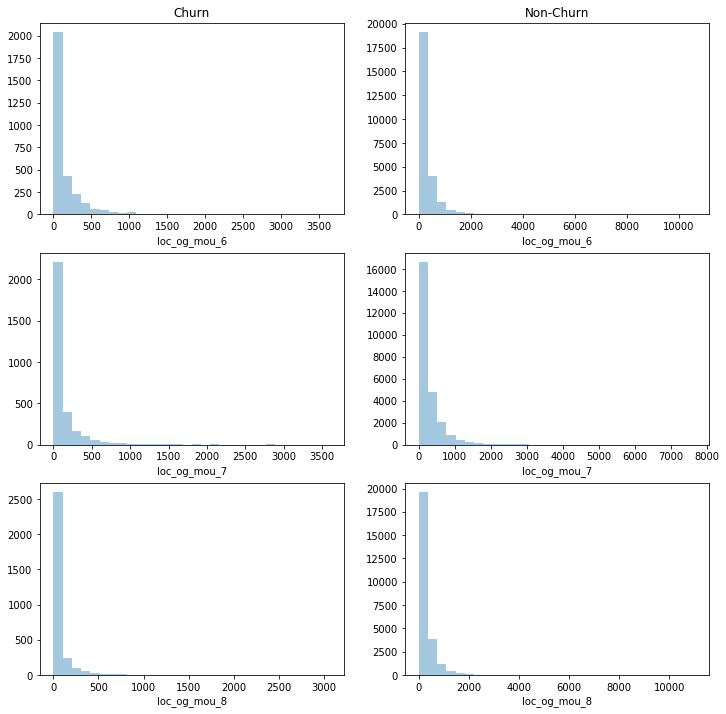

In [42]:
# loc_og_mou (Local and outgoing calls- within same telecom circle)
ExploratoryAnalysis('loc_og_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'loc_og_mou_7' and 'loc_og_mou_8' are strongly and positively correlated with each other.<br>
- The 'loc_og_mou' values of Non-churners are usually very high compared to churners in the respective month.

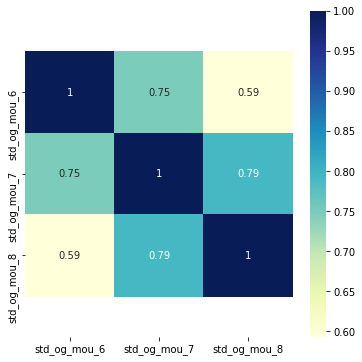

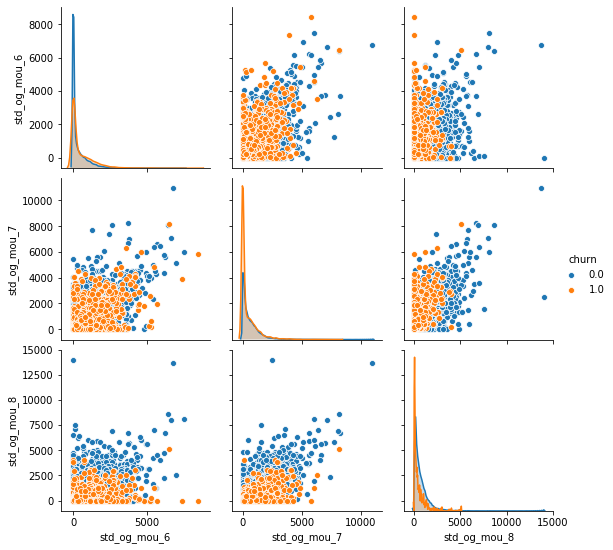

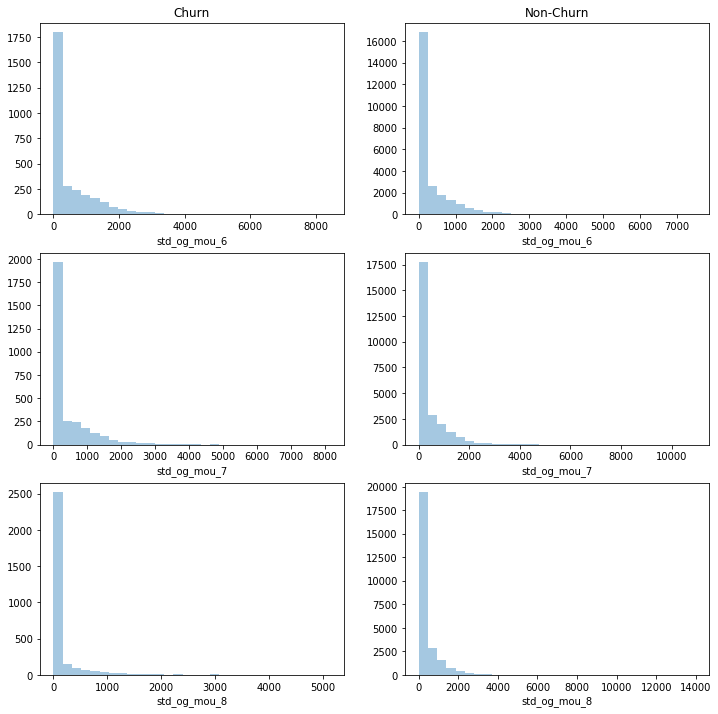

In [43]:
# std_og_mou (STD and outgoing calls - outside the calling circle)
ExploratoryAnalysis('std_og_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'std_og_mou_7' and 'std_og_mou_8' are strongly and positively correlated with each other.<br>
- The 'std_og_mou' values of Non-churners are usually very high compared to churners in the respective month.

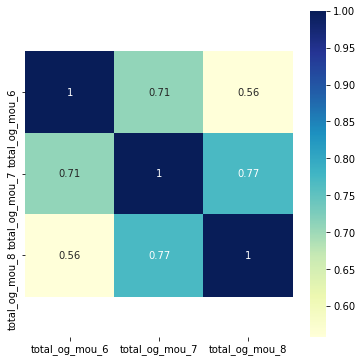

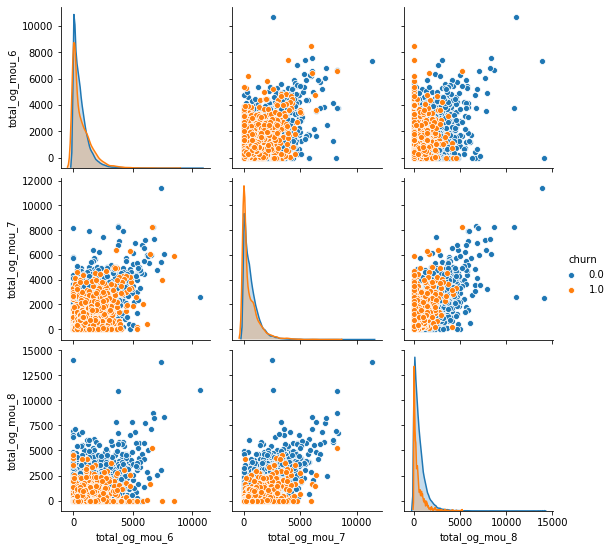

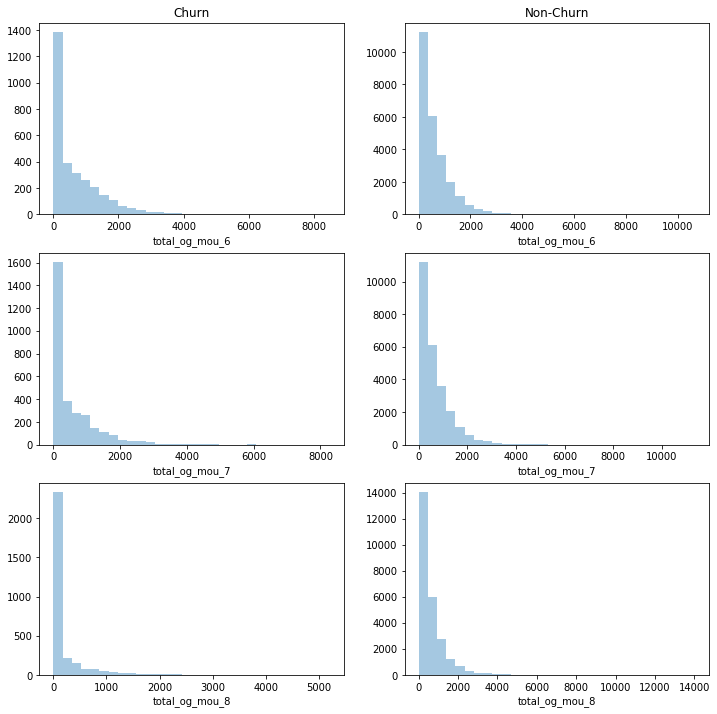

In [44]:
# total_og_mou (Outgoing calls - Minutes of usage - voice calls)
ExploratoryAnalysis('total_og_mou')

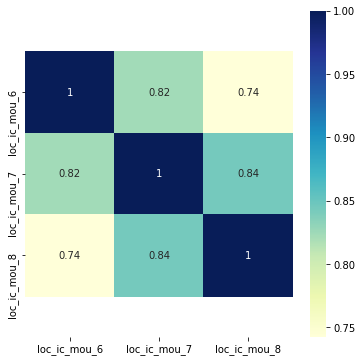

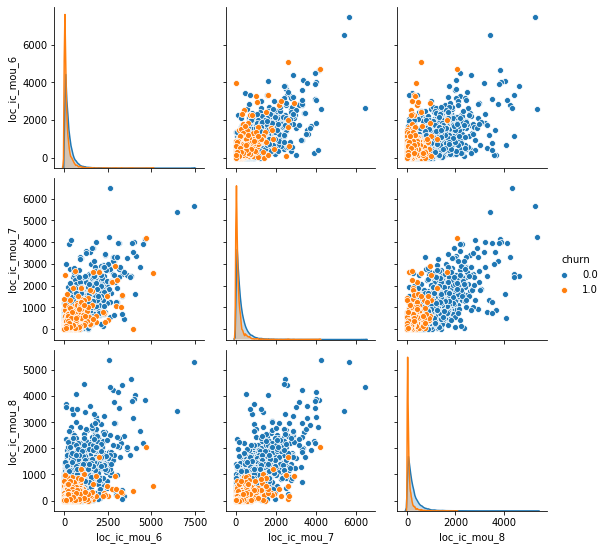

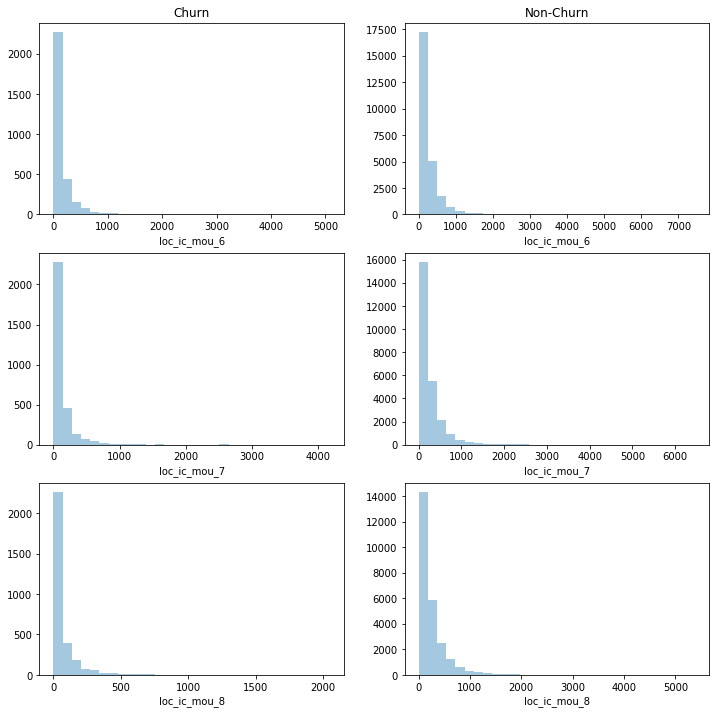

In [45]:
# loc_ic_mou
ExploratoryAnalysis('loc_ic_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'loc_ic_mou_7' and 'loc_ic_mou_8' are strongly and positively correlated with each other.<br>
- The 'loc_ic_mou' values of Non-churners are usually very high compared to churners in the respective month.

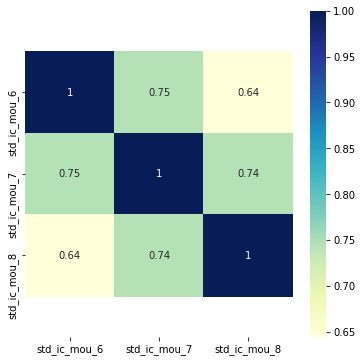

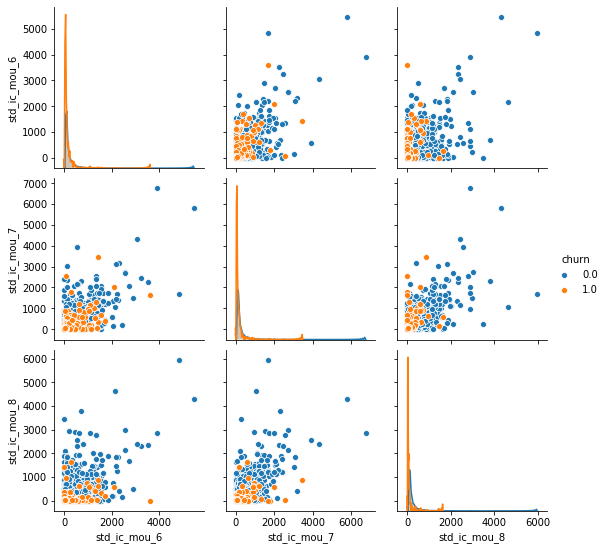

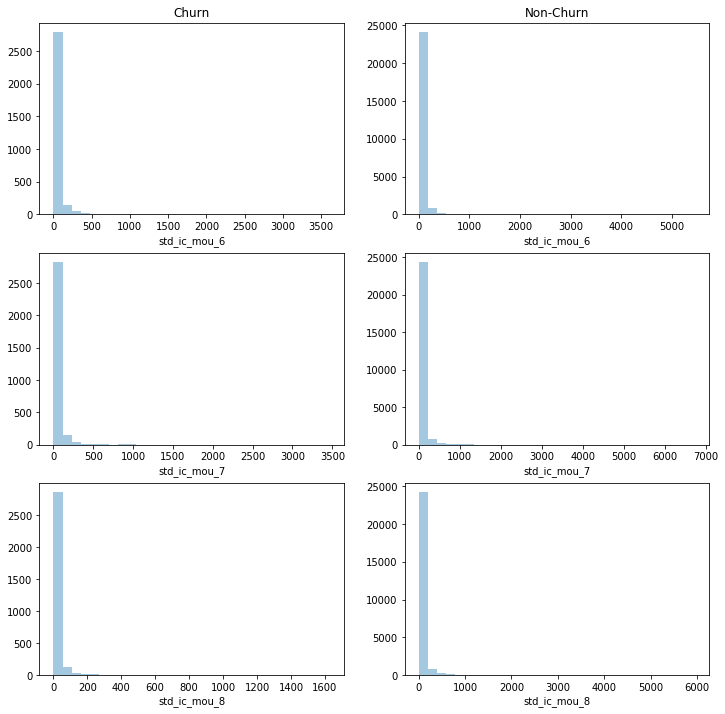

In [46]:
# std_ic_mou (STD and incoming calls - outside the calling circle)
ExploratoryAnalysis('std_ic_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'std_ic_mou_7' and 'std_ic_mou_8' are strongly and positively correlated with each other.<br>
- The 'std_ic_mou' values of Non-churners are usually very high compared to churners in the respective month.

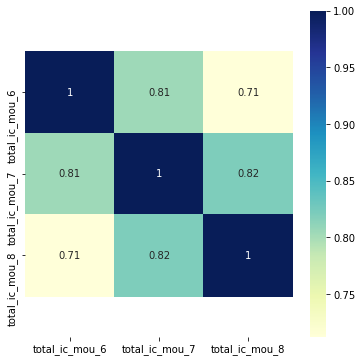

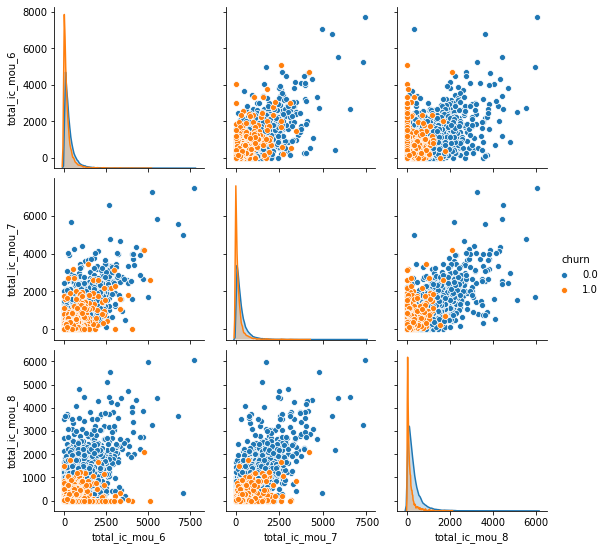

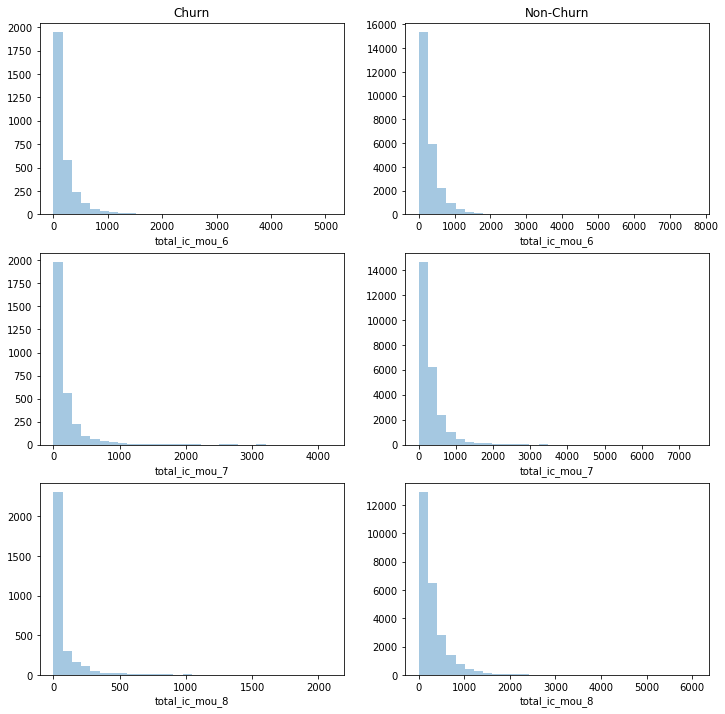

In [47]:
# total_ic_mou (Incoming calls - Minutes of usage - voice calls)
ExploratoryAnalysis('total_ic_mou')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'total_ic_mou_7' and 'total_ic_mou_8' are strongly and positively correlated with each other.<br>
- The 'total_ic_mou' values of Non-churners are usually very high compared to churners in the respective month.

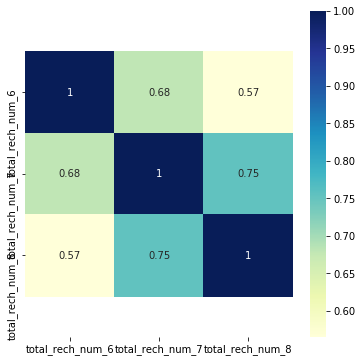

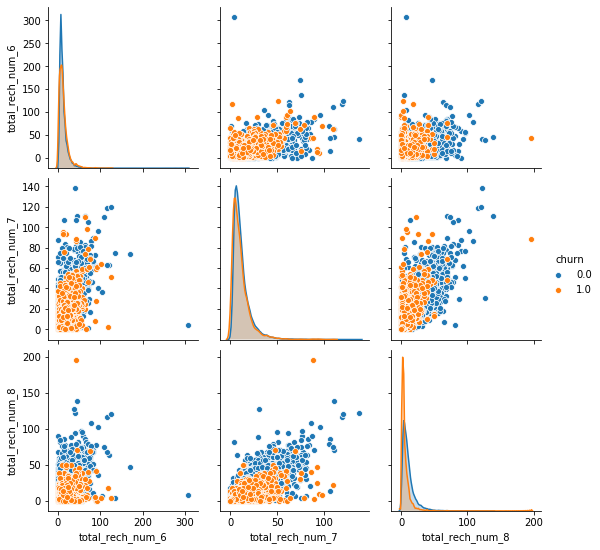

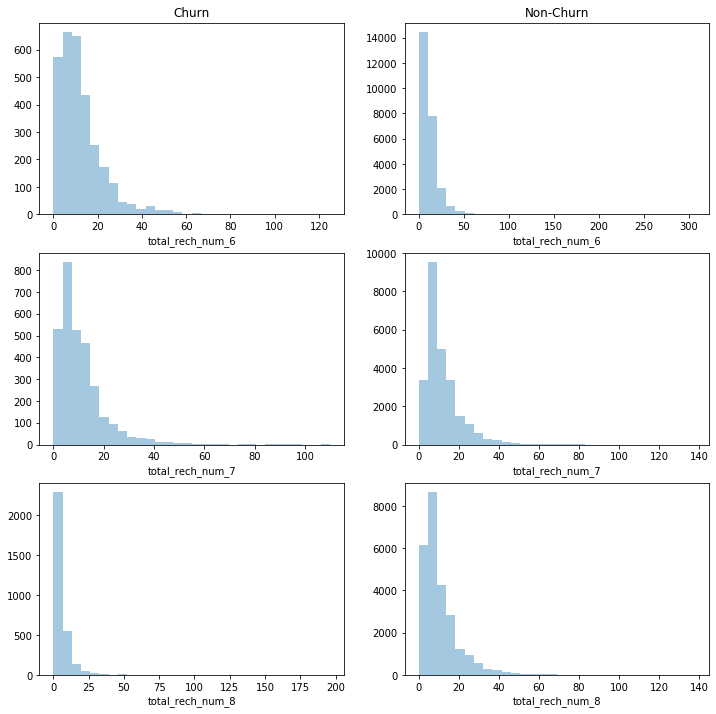

In [48]:
# total_rech_num
ExploratoryAnalysis('total_rech_num')

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
- 'total_rech_num_6', 'total_rech_num_7' and 'total_rech_num_8' are positively correlated with each other.<br>
- The 'total_rech_num' values of Non-churners are usually very high compared to churners in the respective month.

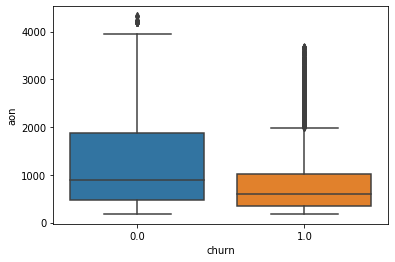

In [49]:
# aon (Age on network - number of days the customer is using the operator T network)
sns.boxplot(x='churn', y='aon', data=telecom)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>OBSERVATION:</b><br><br>
The average 'aon' for Non churners is higher than churners.

## DERIVED VARIABLES

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
<b>METHODOLOGY:</b><br><br>
- The features 'roam_ic_mou' and 'roam_og_mou' are added to create 'roam_mou'<br>
- The features 'count_rech_2g' and 'count_rech_3g' are added to create 'count_rech' <br>
- The features 'vol_mb_2g' and 'vol_mb_3g' are added to create 'vol_mb'<br>
- The features 'sachet_2g' and 'sachet_3g' are added to create 'sachet'<br>
- The features 'monthly_2g' and 'monthly_3g' are added to create 'monthly'<br>
- The features 'arpu_2g' and 'arpu_3g' are added to create 'arpu_data'<br>
- The features 'total_rech_data' and 'av_rech_amt_data' are multiplied to create 'total_rech_amt_data'<br>
- Since 'total_og_mou' = 'local_og_mou' + 'std_og_mou', the individual featues which contributed to these totals are dropped.<br>
- Since 'total_ic_mou' = 'local_ic_mou' + 'std_ic_mou', the individual featues which contributed to these totals are dropped.<br>

In [50]:
telecom['roam_mou_6'] = telecom[['roam_ic_mou_6','roam_og_mou_6']].sum(axis = 1)
telecom['roam_mou_7'] = telecom[['roam_ic_mou_7','roam_og_mou_7']].sum(axis = 1)
telecom['roam_mou_8'] = telecom[['roam_ic_mou_8','roam_og_mou_8']].sum(axis = 1)
telecom.drop(['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8'],
            axis = 1, inplace = True)

In [51]:
telecom.drop([ 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6','loc_og_mou_6'], axis = 1, inplace = True)
telecom.drop([ 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8','loc_og_mou_8'], axis = 1, inplace = True)
telecom.drop([ 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7','loc_og_mou_7'], axis = 1, inplace = True)

In [52]:
telecom.drop([ 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6','std_og_mou_6'], axis =1, inplace = True)
telecom.drop([ 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7','std_og_mou_7'], axis =1, inplace = True)
telecom.drop([ 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8','std_og_mou_8'], axis =1, inplace = True)

In [53]:
telecom.drop([ 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6'], axis = 1, inplace = True)
telecom.drop([ 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7'], axis = 1, inplace = True)
telecom.drop([ 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8'], axis = 1, inplace = True)

In [54]:
telecom.drop([ 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6','std_ic_mou_6'], axis = 1, inplace = True)
telecom.drop([ 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7','std_ic_mou_7'], axis = 1, inplace = True)
telecom.drop([ 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8','std_ic_mou_8'], axis = 1, inplace = True)

In [55]:
telecom['count_rech_6'] = telecom[['count_rech_2g_6', 'count_rech_3g_6']].sum(axis = 1)
telecom['count_rech_7'] = telecom[['count_rech_2g_7', 'count_rech_3g_7']].sum(axis = 1)
telecom['count_rech_8'] = telecom[['count_rech_2g_8', 'count_rech_3g_8']].sum(axis = 1)
telecom.drop(['count_rech_2g_8', 'count_rech_3g_8','count_rech_2g_7', 'count_rech_3g_7',
             'count_rech_2g_6', 'count_rech_3g_6'], axis = 1, inplace = True)

In [56]:
telecom['vol_mb_6'] = telecom[['vol_2g_mb_6','vol_3g_mb_6']].sum(axis = 1)
telecom['vol_mb_7'] = telecom[['vol_2g_mb_7','vol_3g_mb_7']].sum(axis = 1)
telecom['vol_mb_8'] = telecom[['vol_2g_mb_8','vol_3g_mb_8']].sum(axis = 1)
telecom.drop(['vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8'],
            axis = 1, inplace = True)

In [57]:
telecom['monthly_6'] = telecom[['monthly_2g_6','monthly_3g_6']].sum(axis = 1)
telecom['monthly_7'] = telecom[['monthly_2g_7','monthly_3g_7']].sum(axis = 1)
telecom['monthly_8'] = telecom[['monthly_2g_8','monthly_3g_8']].sum(axis = 1)
telecom.drop(['monthly_2g_6','monthly_3g_6','monthly_2g_7','monthly_3g_7','monthly_2g_8','monthly_3g_8'],
            axis = 1, inplace = True)

In [58]:
telecom['sachet_6'] = telecom[[ 'sachet_2g_6', 'sachet_3g_6']].sum(axis = 1)
telecom['sachet_7'] = telecom[[ 'sachet_2g_7', 'sachet_3g_7']].sum(axis = 1)
telecom['sachet_8'] = telecom[[ 'sachet_2g_8', 'sachet_3g_8']].sum(axis = 1)
telecom.drop(['sachet_2g_8', 'sachet_3g_8','sachet_2g_7', 'sachet_3g_7','sachet_2g_6', 'sachet_3g_6'],
            axis = 1, inplace = True)

In [59]:
# Calculate the total recharge amount for data.
telecom['total_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom.drop(['total_rech_data_6', 'total_rech_data_7','total_rech_data_8',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],
            axis=1, inplace=True)

In [60]:
telecom['arpu_data_6'] = telecom[[ 'arpu_2g_6', 'arpu_3g_6']].sum(axis = 1)
telecom['arpu_data_7'] = telecom[[ 'arpu_2g_7', 'arpu_3g_7']].sum(axis = 1)
telecom['arpu_data_8'] = telecom[[ 'arpu_2g_8', 'arpu_3g_8']].sum(axis = 1)
telecom.drop(['arpu_2g_6', 'arpu_3g_6','arpu_2g_7', 'arpu_3g_7','arpu_2g_8', 'arpu_3g_8'],
            axis = 1, inplace = True)

In [61]:
# Get the shape of the dataframe
telecom.shape

(28532, 80)

In [62]:
# Get the remaining columns of the dataframe.
telecom.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7',

## OUTLIER ANALYSIS

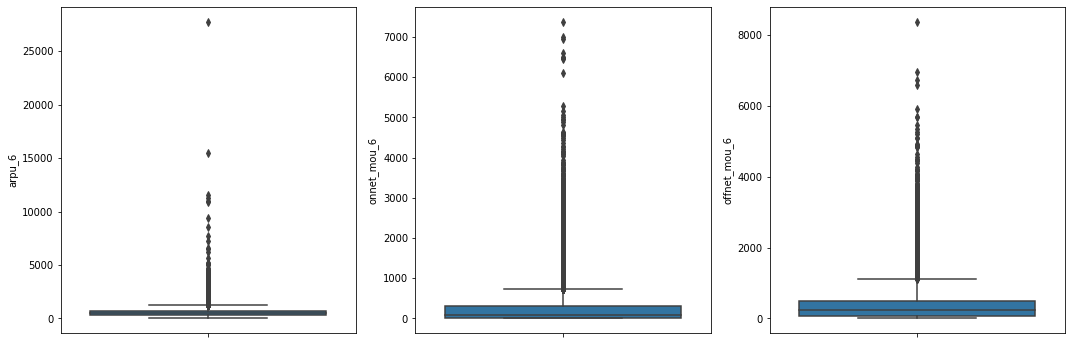

In [63]:
# Plot the individual boxplots for few numerical attributes.
plt.figure(figsize=(18,6))
columns=['arpu_6', 'onnet_mou_6', 'offnet_mou_6']
for i in enumerate(columns): 
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(y=i[1], data=telecom)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">It is clear from the above plots that there are outliers in the data. This will effect the data while analyzing and doesn't provide accurate results.<br>So, inorder to overcome the problem of outliers, we create the 2 quantiles q1 and q2 for 1st and 99th percentile and find the interquantile range iqr.<br>Then, we perform capping the dataframe with all the rows greater than l=(q1-1.5*iqr) and less than h=(q1+1.5*iqr)<br> All the values which has the values greater than l and h are considered as the outliers and are capped.</p>

In [64]:
# Capping.
features = [x for x in telecom.columns if x != 'churn'] 
for i in features:     
    Q1 = telecom[i].quantile(0.01)     
    Q4 = telecom[i].quantile(0.99)
    telecom[i][telecom[i] <= Q1] = Q1     
    telecom[i][telecom[i] >= Q4] = Q4  

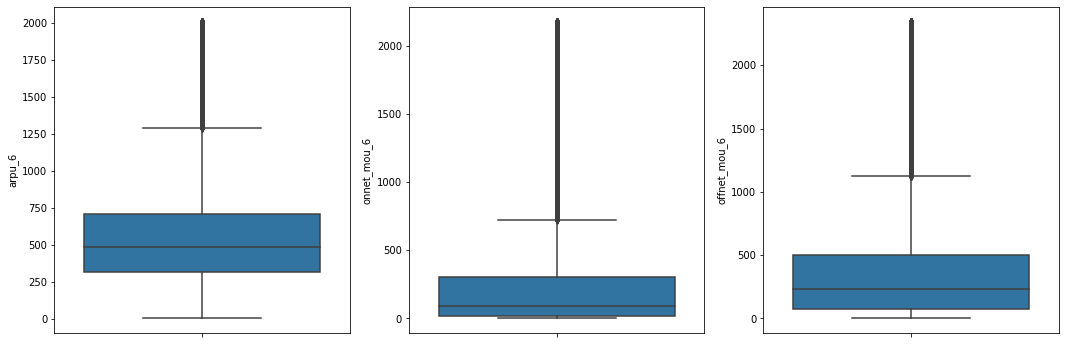

In [65]:
# Validation
plt.figure(figsize=(18,6))
columns=['arpu_6', 'onnet_mou_6', 'offnet_mou_6']
for i in enumerate(columns): 
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(y=i[1], data=telecom)
plt.show()

## DATA PREPARATION

## TRAIN - TEST SPLIT

In [66]:
# Put the feature variables to X.
X = telecom.drop('churn', axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_6,...,monthly_8,sachet_6,sachet_7,sachet_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8
0,197.385,214.816,213.80300,7.146,2.11,0.00,52.164,32.606,0.00,0.0,...,1.0,0.0,0.0,0.0,252.0,252.0,252.0,424.34,424.34,424.34
1,1069.180,1349.850,1995.75281,57.840,54.68,52.29,453.430,567.160,325.91,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,378.721,492.223,137.36200,413.690,351.03,35.08,94.660,80.630,136.48,0.0,...,0.0,0.0,1.0,3.0,0.0,354.0,207.0,0.00,0.00,19.83
3,514.453,597.753,637.76000,102.410,132.11,85.14,757.930,896.680,983.39,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,74.350,193.897,366.96600,48.960,50.66,33.58,85.410,89.360,205.89,0.0,...,1.0,0.0,0.0,1.0,0.0,712.0,540.0,0.00,608.35,347.94


In [67]:
# Put the response variable to y.
y = telecom['churn']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [68]:
# Import the required libraries.
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## DATA SCALING

<p style="font-family: Arial; font-size:1.0em;color:blue;">Scaling is an important step in the data pre-processing of the model. It helps us in analysing the data more easily. Since, the range of features vary widely, scaling is used to limit or set the values in a certain range. This helps us in analysing the data better because all the features has the values in certain range<br>Standard Scaling  transforms the data in a way that the mean of the data will be 0 with standard deviation 1.

In [69]:
# Import the required libraries.
from sklearn.preprocessing import StandardScaler

In [70]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

# 'Fit' and transform the train set
X_train = scaler.fit_transform(X_train)

# Create the dataframe.
X_train = pd.DataFrame(X_train, columns = X.columns)

# Look at the head of the dataframe.
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_6,...,monthly_8,sachet_6,sachet_7,sachet_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8
0,0.503924,0.862666,1.454549,0.869614,1.983387,3.984503,-0.047003,0.240487,0.363573,-0.156876,...,-0.525080,-0.488125,-0.137516,-0.468156,-0.477804,-0.448678,-0.436622,-0.458475,-0.340929,-0.430509
1,-0.797120,-1.140795,-0.959874,-0.634361,-0.628569,-0.586374,-0.839353,-0.810164,-0.794465,-0.156876,...,1.044579,-0.488125,-0.504839,-0.468156,0.243763,-0.325514,-0.269320,-0.458368,-0.452577,-0.430509
2,-0.747050,-0.767294,-0.154962,-0.612069,-0.594419,-0.573188,-0.585622,-0.653793,-0.575368,0.047928,...,2.614238,-0.488125,-0.504839,-0.468156,-0.245872,-0.280727,0.423785,-0.458440,-0.452507,-0.427099
3,0.683302,-0.499531,-0.222750,-0.453975,-0.531656,-0.345457,0.393583,-0.526942,0.111661,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.182618,-0.280727,-0.436622,1.585454,-0.410250,-0.430509
4,-1.192003,-0.316539,-1.286449,-0.633081,-0.628569,-0.586374,-0.681135,-0.537652,-0.734358,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.182618,-0.203367,-0.436622,1.069108,-0.441448,-0.430509


In [71]:
# Look at the summary statistics of the train dataframe.
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_6,...,monthly_8,sachet_6,sachet_7,sachet_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8
count,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,...,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04,1.997200e+04
mean,5.364336e-19,-1.670199e-16,-1.786845e-16,1.347310e-16,7.612910e-17,7.629587e-17,9.676651e-17,-1.126372e-16,5.807380e-17,-7.297610e-16,...,-1.354370e-16,-2.820585e-17,-5.387795e-16,1.115693e-15,-8.594056e-17,-2.092591e-16,-5.362113e-16,-8.296794e-17,3.952487e-16,-2.236900e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.522334e+00,-1.524522e+00,-1.314171e+00,-6.343611e-01,-6.285687e-01,-5.863741e-01,-8.537403e-01,-8.475349e-01,-8.107383e-01,-1.568756e-01,...,-5.250796e-01,-4.881246e-01,-5.048390e-01,-4.681561e-01,-4.778043e-01,-4.822682e-01,-4.366217e-01,-4.584754e-01,-4.525773e-01,-4.305092e-01
25%,-6.660800e-01,-6.706354e-01,-6.940969e-01,-5.870305e-01,-5.854734e-01,-5.519459e-01,-6.763580e-01,-6.752408e-01,-6.771955e-01,-1.568756e-01,...,-5.250796e-01,-4.881246e-01,-5.048390e-01,-4.681561e-01,-4.778043e-01,-4.822682e-01,-4.366217e-01,-4.584754e-01,-4.525773e-01,-4.305092e-01
50%,-1.861140e-01,-1.927970e-01,-1.856837e-01,-4.176755e-01,-4.227871e-01,-4.108180e-01,-3.288444e-01,-3.356532e-01,-3.478038e-01,-1.568756e-01,...,-5.250796e-01,-4.881246e-01,-5.048390e-01,-4.681561e-01,-4.297779e-01,-3.825153e-01,-4.116352e-01,-4.584754e-01,-4.525773e-01,-4.305092e-01
75%,4.249582e-01,4.126296e-01,4.288000e-01,1.026284e-01,9.131203e-02,4.708078e-02,2.815581e-01,2.847090e-01,2.822089e-01,-1.568756e-01,...,1.044579e+00,-8.313853e-02,2.298067e-01,-7.170030e-02,-9.254147e-03,9.792725e-02,-1.411285e-01,-1.085857e-01,-1.276930e-01,-2.127262e-01
max,4.014611e+00,4.039242e+00,3.869049e+00,4.618468e+00,4.550037e+00,4.830725e+00,4.511686e+00,4.642625e+00,4.578490e+00,8.638797e+00,...,4.183897e+00,4.371708e+00,4.270358e+00,4.685770e+00,5.644858e+00,5.915577e+00,5.836058e+00,4.945985e+00,5.103768e+00,5.178984e+00


In [72]:
# Transform the test set
X_test = scaler.transform(X_test)

# Create the dataframe.
X_test = pd.DataFrame(X_test, columns = X.columns)

# Look at the dataframe.
X_test

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_6,...,monthly_8,sachet_6,sachet_7,sachet_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8
0,-0.946775,-0.956955,-0.203695,-0.634361,-0.628569,-0.581109,-0.853740,-0.847535,-0.786730,-0.156876,...,2.614238,-0.488125,-0.504839,-0.468156,-0.182618,-0.225761,0.658441,1.056505,1.046726,2.681074
1,-0.343074,-0.293601,-0.194080,-0.467017,-0.300774,-0.203390,-0.375077,-0.140202,0.180760,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.071700,-0.477804,-0.482268,-0.411635,-0.458475,-0.452577,-0.430509
2,2.078146,0.533946,1.333676,-0.533336,-0.521002,-0.181421,-0.551600,-0.367782,-0.123587,0.064995,...,-0.525080,1.131820,1.699098,2.307035,3.465045,1.020133,1.867573,4.481465,1.771980,2.404519
3,0.618312,0.070731,-0.400170,-0.374276,-0.346835,-0.229515,-0.036281,-0.415571,-0.260832,3.514655,...,-0.525080,0.321848,-0.504839,-0.468156,1.483078,0.144750,-0.436622,0.173329,-0.252246,-0.430509
4,-0.400842,-0.355069,-0.378692,-0.409367,-0.423020,-0.419203,-0.208176,0.043910,-0.122659,-0.156876,...,1.044579,-0.488125,-0.504839,-0.468156,-0.297412,-0.325514,-0.269320,-0.439197,-0.362905,-0.414377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8555,1.018444,0.917097,0.464153,-0.536693,-0.571389,0.047056,2.196548,1.550284,1.585702,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.477804,-0.325514,-0.436622,-0.458475,0.459123,-0.430509
8556,1.856374,2.003004,3.349258,2.589260,4.166821,2.141363,1.022698,0.476572,2.638358,-0.156876,...,1.044579,-0.083139,-0.137516,-0.071700,-0.448520,0.081641,0.165228,-0.458475,1.048386,1.196190
8557,-0.996643,0.290759,1.018458,-0.410696,0.007758,0.387544,-0.491392,1.307921,3.621402,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.477804,-0.482268,-0.436622,-0.458475,-0.452577,-0.430509
8558,-0.431460,-0.356916,-1.045348,-0.451439,-0.370027,-0.523526,-0.142882,-0.090231,-0.373398,-0.156876,...,-0.525080,-0.083139,-0.504839,-0.468156,-0.371209,-0.482268,-0.436622,0.096179,-0.452577,-0.430509


In [73]:
# Look at the summary statistics of the test dataframe.
X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_6,...,monthly_8,sachet_6,sachet_7,sachet_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8
count,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,...,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000
mean,0.005711,-0.000109,-0.007802,-0.023824,-0.029078,-0.029311,0.014998,0.017647,0.017576,0.021228,...,0.020083,0.003110,-0.002774,0.010092,-0.011545,0.008541,0.006720,-0.011550,0.004000,0.006273
std,0.993886,1.007360,1.000198,0.962111,0.954166,0.951349,1.006471,1.030555,1.025522,1.062057,...,1.016924,1.002833,1.000405,1.020263,0.975782,1.027995,1.009109,0.975622,1.003937,0.999481
min,-1.522334,-1.524522,-1.314171,-0.634361,-0.628569,-0.586374,-0.853740,-0.847535,-0.810738,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.477804,-0.482268,-0.436622,-0.458475,-0.452577,-0.430509
25%,-0.649167,-0.655377,-0.704152,-0.587326,-0.587179,-0.552817,-0.668042,-0.676563,-0.675320,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.477804,-0.482268,-0.436622,-0.458475,-0.452577,-0.430509
50%,-0.184772,-0.207875,-0.181482,-0.418303,-0.426160,-0.411278,-0.315556,-0.327542,-0.342379,-0.156876,...,-0.525080,-0.488125,-0.504839,-0.468156,-0.405179,-0.380479,-0.409462,-0.458475,-0.452577,-0.430509
75%,0.407410,0.395015,0.407065,0.079232,0.046444,0.018114,0.295596,0.296026,0.294017,-0.156876,...,1.044579,-0.083139,0.229807,-0.071700,-0.018625,0.068409,-0.106365,-0.109978,-0.128585,-0.219967
max,4.014611,4.039242,3.869049,4.618468,4.550037,4.830725,4.511686,4.642625,4.578490,8.638797,...,4.183897,4.371708,4.270358,4.685770,5.644858,5.915577,5.836058,4.945985,5.103768,5.178984


## PRINCIPAL COMPONENT ANALYSIS

<p style="font-family: Arial; font-size:1.0em;color:blue;">Principal component analysis (PCA) is a method for reducing the dimensionality of large datasets for increasing interpretability of the model with minimal loss of information.

In [74]:
# Import the required libraries
from sklearn.decomposition import PCA

In [75]:
# Create a pca object
pca = PCA(svd_solver='randomized', random_state=42)

# Fit the data.
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [76]:
# Look at the principal components.
pca.components_

array([[-6.97791716e-02, -7.32388586e-02, -4.95909816e-02, ...,
         1.74725226e-01,  1.75656070e-01,  1.71925828e-01],
       [ 2.11385088e-01,  2.37408595e-01,  2.37306780e-01, ...,
         1.30178701e-01,  1.37131290e-01,  1.47098224e-01],
       [ 9.99288438e-02,  1.35113518e-01,  1.43868591e-01, ...,
        -2.32313146e-03,  1.40938033e-02,  3.18554355e-02],
       ...,
       [ 2.31943286e-03, -1.49070362e-03,  2.60695426e-03, ...,
         3.14674090e-04,  2.17945829e-03,  4.72360011e-04],
       [ 0.00000000e+00,  1.53693602e-16,  1.60076809e-15, ...,
         5.20417043e-17, -2.91433544e-16, -1.11022302e-16],
       [ 0.00000000e+00,  2.77555756e-17,  9.49878232e-17, ...,
        -1.83880688e-16,  0.00000000e+00, -1.24900090e-16]])

In [77]:
# Get the variance explained by the principal components.
var =  pca.explained_variance_ratio_
var

array([1.69852894e-01, 1.24999452e-01, 8.22722449e-02, 5.00720989e-02,
       3.58812690e-02, 3.36872668e-02, 3.17594276e-02, 2.80051656e-02,
       2.61050977e-02, 2.51647062e-02, 2.21410698e-02, 2.09461894e-02,
       2.06077290e-02, 1.87559817e-02, 1.76201771e-02, 1.60402397e-02,
       1.45649727e-02, 1.40940697e-02, 1.30627274e-02, 1.16000942e-02,
       1.13408449e-02, 1.07174994e-02, 1.06444006e-02, 9.92819273e-03,
       9.25223588e-03, 9.04695616e-03, 8.69203587e-03, 8.46524473e-03,
       7.94425802e-03, 7.77397676e-03, 7.45969751e-03, 7.09111306e-03,
       7.00707359e-03, 6.76635018e-03, 6.03243400e-03, 5.90202033e-03,
       5.56236419e-03, 5.54682351e-03, 5.23290018e-03, 5.05779875e-03,
       4.71375162e-03, 4.25055187e-03, 3.87114384e-03, 3.79848929e-03,
       3.72206921e-03, 3.65107642e-03, 3.58457986e-03, 3.27473237e-03,
       3.17069560e-03, 3.03984482e-03, 2.55910668e-03, 2.49619601e-03,
       2.43041596e-03, 2.21635919e-03, 1.96295848e-03, 1.87126295e-03,
      

In [78]:
# Get the cumulative variance explained.
var_cumu = np.cumsum(var)
var_cumu

array([0.16985289, 0.29485235, 0.37712459, 0.42719669, 0.46307796,
       0.49676522, 0.52852465, 0.55652982, 0.58263492, 0.60779962,
       0.62994069, 0.65088688, 0.67149461, 0.69025059, 0.70787077,
       0.72391101, 0.73847598, 0.75257005, 0.76563278, 0.77723287,
       0.78857372, 0.79929122, 0.80993562, 0.81986381, 0.82911605,
       0.838163  , 0.84685504, 0.85532028, 0.86326454, 0.87103852,
       0.87849822, 0.88558933, 0.8925964 , 0.89936275, 0.90539519,
       0.91129721, 0.91685957, 0.92240639, 0.92763929, 0.93269709,
       0.93741084, 0.9416614 , 0.94553254, 0.94933103, 0.9530531 ,
       0.95670418, 0.96028876, 0.96356349, 0.96673418, 0.96977403,
       0.97233313, 0.97482933, 0.97725975, 0.97947611, 0.98143906,
       0.98331033, 0.98509234, 0.98685139, 0.98832433, 0.98977025,
       0.99112503, 0.99240198, 0.99360067, 0.99464791, 0.99562038,
       0.9965196 , 0.99735934, 0.99810793, 0.99867827, 0.9991307 ,
       0.99948441, 0.99971769, 0.99983682, 0.99990848, 0.99995

In [79]:
# Get the eigen values of the principal components.
pca.explained_variance_

array([1.30793277e+01, 9.62543974e+00, 6.33528007e+00, 3.85574467e+00,
       2.76299606e+00, 2.59404942e+00, 2.44559837e+00, 2.15650573e+00,
       2.01019317e+00, 1.93777940e+00, 1.70494774e+00, 1.61293735e+00,
       1.58687459e+00, 1.44428291e+00, 1.35682158e+00, 1.23516030e+00,
       1.12155905e+00, 1.08529771e+00, 1.00588037e+00, 8.93251979e-01,
       8.73288784e-01, 8.25288779e-01, 8.19659890e-01, 7.64509119e-01,
       7.12457836e-01, 6.96650505e-01, 6.69320275e-01, 6.51856483e-01,
       6.11738498e-01, 5.98626184e-01, 5.74425469e-01, 5.46043046e-01,
       5.39571683e-01, 5.21035052e-01, 4.64520676e-01, 4.54478321e-01,
       4.28323489e-01, 4.27126797e-01, 4.02953490e-01, 3.89470005e-01,
       3.62977049e-01, 3.27308883e-01, 2.98093001e-01, 2.92498321e-01,
       2.86613680e-01, 2.81146961e-01, 2.76026470e-01, 2.52167019e-01,
       2.44155786e-01, 2.34079771e-01, 1.97061081e-01, 1.92216717e-01,
       1.87151399e-01, 1.70668203e-01, 1.51155371e-01, 1.44094462e-01,
      

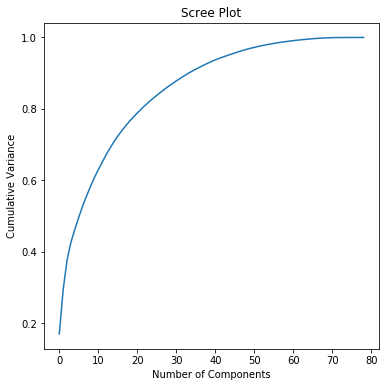

In [80]:
# Plot the scree plot.
fig = plt.figure(figsize = (6,6))
plt.plot(var_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
Run Incremental PCA with 65 components

In [81]:
# Import the required module.
from sklearn.decomposition import IncrementalPCA

In [82]:
# Create pca object.
pca_final = IncrementalPCA(n_components = 65)

# Fit and transform the train dataset.
X_train_pca = pca_final.fit_transform(X_train)

# Look at the shape.
X_train_pca.shape

(19972, 65)

In [83]:
# Create the train dataframe.
column_names = ['PC'+ str(i) for i in range(1,66)]
X_train_pca = pd.DataFrame(X_train_pca, columns = column_names)

# Look at the head of the dataframe.
X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,-3.561254,4.436482,-0.599793,-0.245286,-3.194462,-0.890999,-0.691557,3.510038,2.526656,0.338610,...,0.350396,-0.351076,-0.457212,0.062535,0.022940,0.114173,0.122701,-0.153780,-0.568672,0.034121
1,2.714530,-1.859239,-3.197489,-0.840626,0.272977,-0.078200,-0.248152,-0.039381,0.138572,-0.322592,...,-0.286817,0.022184,-0.033041,-0.222104,0.078373,-0.008168,0.187930,-0.082022,0.187481,0.030080
2,5.671902,0.775629,-2.133639,-1.444089,1.504218,-0.337443,-0.968309,-0.777774,-1.580571,-0.356551,...,0.297821,0.696500,-0.334797,0.110423,-0.001964,0.091967,-0.281495,-0.180187,0.121727,-0.218644
3,1.761239,1.305390,-1.900178,-0.653247,1.063928,0.811695,1.013517,-0.118635,-0.112492,-0.498797,...,0.494603,-0.289296,0.456095,-0.091424,-0.324172,0.023842,0.172094,0.435238,0.063789,-0.182713
4,1.970586,-1.291205,-3.780397,-0.844732,-0.598369,0.639504,-0.041033,-0.014822,-0.160598,0.585098,...,0.108858,-0.538704,0.131905,-0.416200,-0.368590,0.083383,-0.380183,0.088129,0.214640,-0.099839


In [84]:
# Transform the test dataset.
X_test_pca = pca_final.transform(X_test)

# Look at the shape.
X_test_pca.shape

(8560, 65)

In [85]:
# Create the test dataframe.
column_names = ['PC'+ str(i) for i in range(1,66)]
X_test_pca = pd.DataFrame(X_test_pca, columns = column_names)

# Look at the head of the dataframe.
X_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,5.842416,0.721593,-2.833816,-1.725226,0.272572,-0.319073,-1.188204,-0.574844,-0.487928,-0.353268,...,0.015019,0.062413,-0.038064,0.653453,0.088378,-0.107875,-0.213554,0.762489,0.162592,-0.423137
1,-2.681738,-1.856880,0.541054,-0.168932,0.833308,-0.967426,-0.012521,-1.189681,-0.256169,-0.479210,...,-0.082734,0.080227,0.029488,0.045672,0.075789,-0.016685,0.355441,0.017657,-0.110407,-0.015356
2,5.769021,2.209279,6.277916,1.521698,1.199225,3.445057,1.443450,0.441174,2.439213,1.523231,...,-0.058143,-0.550470,0.092004,-0.786182,-0.154598,-0.159445,-0.207193,0.136414,-0.287034,-0.001191
3,2.490343,1.283875,-1.464402,1.212672,0.802079,2.864582,0.159291,-0.113862,0.153124,-1.720805,...,-0.141880,-0.943783,0.486125,0.154584,0.381099,-0.002399,-0.039572,0.635787,-0.497175,-0.217944
4,1.356355,-0.406877,-1.970829,-0.453998,0.342010,-0.849074,0.105359,-0.311879,0.063565,-0.519883,...,0.131054,0.088991,-0.066960,0.268276,-0.124116,-0.211392,-0.021930,-0.003301,-0.013656,-0.008159


## LOGISTIC REGRESSION

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
Let's build our 1st model will all the 65 principal components

In [86]:
# Import the required libraries.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [87]:
# Create a logistic regression object.
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_pca, y_train)

y_train_pred = logreg.predict(X_train_pca) 
y_test_pred = logreg.predict(X_test_pca)

print(f"Accuracy of train data: {metrics.accuracy_score(y_train, y_train_pred)}")
print(f"Recall/Sensitivity of train data: {metrics.recall_score(y_train, y_train_pred)}")
print("")
print(f"Accuracy of test data: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Recall/Sensitivity of test data: {metrics.recall_score(y_test, y_test_pred)}")

Accuracy of train data: 0.8029741638293612
Recall/Sensitivity of train data: 0.820631970260223

Accuracy of test data: 0.8059579439252337
Recall/Sensitivity of test data: 0.8092613009922822


<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's see if we can further reduce our principal components

<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's use RFECV to get the optimal components that can be considered.

In [88]:
# Import the required libraries
from sklearn.feature_selection import RFECV

# Create a logistic regression object.
rfe_lr = LogisticRegression(class_weight='balanced')

# Create a RFECV() object.
rfe_cv = RFECV(estimator=rfe_lr, step=1, cv=5, scoring='roc_auc')

# Fit RFECV() on the train data.
rfe_cv.fit(X_train_pca, y_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

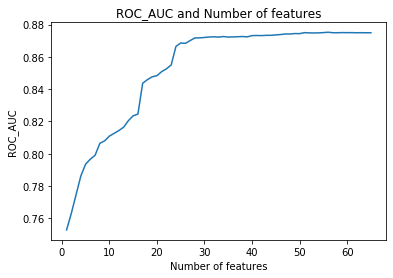

In [89]:
# Plot the ROC_AUC and the number of features
plt.plot(range(1, len(rfe_cv.grid_scores_) + 1), rfe_cv.grid_scores_)
plt.xlabel('Number of features')
plt.ylabel('ROC_AUC')
plt.title("ROC_AUC and Number of features")
plt.show()

In [90]:
# Import the required libraries.
from sklearn.feature_selection import RFE

# Create a logistic regression object.
logreg_rfe = LogisticRegression(class_weight='balanced')

# Run RFE with 30 variables as output
rfe = RFE(logreg_rfe, 30)
rfe = rfe.fit(X_train_pca, y_train)

In [91]:
rfe.support_

array([False,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 35),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 15),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 14),
 ('offnet_mou_7', False, 31),
 ('offnet_mou_8', True, 1),
 ('isd_og_mou_6', True, 1),
 ('isd_og_mou_7', True, 1),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_6', True, 1),
 ('spl_og_mou_7', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('og_others_7', False, 19),
 ('og_others_8', False, 17),
 ('total_og_mou_6', False, 28),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 5),
 ('total_ic_mou_7', False, 2),
 ('total_ic_mou_8', False, 36),
 ('spl_ic_mou_6', True, 1),
 ('spl_ic_mou_7', False, 23),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 22),
 ('isd_ic_mou_7', False, 33),
 ('isd_ic_mou_8', False, 8),
 ('ic_others_6', False, 32),
 ('ic_others_7', False, 21),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', False, 24),
 ('total_rech_num_7', False,

In [93]:
# RFE selected columns/features
rfe_col = X_train_pca.columns[rfe.support_]
rfe_col

Index(['PC2', 'PC3', 'PC4', 'PC6', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
       'PC14', 'PC15', 'PC16', 'PC20', 'PC21', 'PC25', 'PC27', 'PC33', 'PC42',
       'PC43', 'PC44', 'PC45', 'PC46', 'PC50', 'PC52', 'PC53', 'PC58', 'PC60',
       'PC61', 'PC62', 'PC64'],
      dtype='object')

In [94]:
# Create a logistic regression object with rfe selected components.
logreg1 = LogisticRegression(class_weight='balanced')
logreg1.fit(X_train_pca[rfe_col], y_train)

y_train_pred = logreg1.predict(X_train_pca[rfe_col]) 
y_test_pred = logreg1.predict(X_test_pca[rfe_col])

print(f"Accuracy of train data: {metrics.accuracy_score(y_train, y_train_pred)}")
print(f"Recall/Sensitivity of train data: {metrics.recall_score(y_train, y_train_pred)}")
print("")
print(f"Accuracy of test data: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Recall/Sensitivity of test data: {metrics.recall_score(y_test, y_test_pred)}")

Accuracy of train data: 0.8013218505908272
Recall/Sensitivity of train data: 0.8159851301115242

Accuracy of test data: 0.8017523364485981
Recall/Sensitivity of test data: 0.8037486218302095


In [95]:
data = {'Model':'Logistic Regression', 'Sensitivity': [metrics.recall_score(y_test, y_test_pred)], 
                          'Accuracy':[metrics.accuracy_score(y_test, y_test_pred)]}
results = pd.DataFrame(data)
results

,Model,Sensitivity,Accuracy
0,Logistic Regression,0.803749,0.801752


## DECISION TREE CLASSIFIER

In [96]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters,
dt_default = DecisionTreeClassifier(class_weight= 'balanced')
dt_default.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Making predictions
y_pred_default = dt_default.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      7653
         1.0       0.32      0.31      0.32       907

    accuracy                           0.86      8560
   macro avg       0.62      0.62      0.62      8560
weighted avg       0.86      0.86      0.86      8560



In [98]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[7068  585]
 [ 628  279]]
0.8582943925233645
0.30760749724366043


In [99]:
# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100,400,50),
    'min_samples_split': range(100,400,50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, return_train_score = True, scoring='recall',verbose = 1,n_jobs = 4)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed: 16.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'cri

In [100]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.072101,0.636467,0.013283,0.002325,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.767981,...,0.736985,0.035168,149,0.814643,0.788495,0.825203,0.804878,0.756678,0.797979,0.023925
1,3.752866,0.104984,0.010958,0.003026,entropy,5,100,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.767981,...,0.736055,0.036656,151,0.814643,0.788495,0.825203,0.804878,0.756678,0.797979,0.023925
2,4.478116,0.668179,0.029727,0.018822,entropy,5,100,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.767981,...,0.736055,0.036656,151,0.814643,0.788495,0.825203,0.804878,0.756678,0.797979,0.023925
3,4.985198,0.091379,0.023417,0.013026,entropy,5,100,250,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.770302,...,0.734658,0.037626,177,0.808251,0.788495,0.814750,0.804878,0.747967,0.792868,0.024062
4,3.900076,0.103134,0.025601,0.020173,entropy,5,100,300,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.761021,...,0.736523,0.039614,150,0.801278,0.788495,0.814750,0.808943,0.753775,0.793448,0.021697
5,3.651995,0.139069,0.022404,0.010307,entropy,5,100,350,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.761021,...,0.738380,0.039600,102,0.801278,0.792562,0.814750,0.810685,0.753775,0.794610,0.021818
6,3.455200,0.249256,0.026403,0.013528,entropy,5,150,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754060,...,0.737915,0.037092,104,0.794887,0.798954,0.806620,0.798490,0.755517,0.790894,0.018097
7,3.352015,0.086917,0.012784,0.002981,entropy,5,150,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754060,...,0.737915,0.037092,104,0.794887,0.798954,0.806620,0.798490,0.755517,0.790894,0.018097
8,3.663855,0.284307,0.024651,0.009745,entropy,5,150,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754060,...,0.737915,0.037092,104,0.794887,0.798954,0.806620,0.798490,0.755517,0.790894,0.018097
9,4.064979,0.289752,0.016430,0.011874,entropy,5,150,250,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754060,...,0.737915,0.037092,104,0.794887,0.798954,0.806620,0.798490,0.755517,0.790894,0.018097


In [101]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best recall 0.7704332811741218
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 300, 'min_samples_split': 100}


In [102]:
dtree = DecisionTreeClassifier(class_weight = 'balanced', criterion= 'entropy', 
                               max_depth = 5, min_samples_leaf = 300, min_samples_split = 100)
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [103]:
y_pred_dtree = dtree.predict(X_test_pca)

In [104]:
confusion_dtree = confusion_matrix(y_pred=y_pred_dtree, y_true=y_test)

In [105]:
TP = confusion_dtree[1,1] # true positive 
TN = confusion_dtree[0,0] # true negatives
FP = confusion_dtree[0,1] # false positives
FN = confusion_dtree[1,0] # false negatives

In [106]:
print('Sensitivity', TP / float(TP+FN))
print('Specificity', TN / float(TN+FP))
print('Accuracy', (TN+TP) / float(TN+TP+FP+FN))

Sensitivity 0.7453142227122381
Specificity 0.7113550241735267
Accuracy 0.7149532710280374


In [107]:
results = results.append({'Model': 'Decision Tree', 'Sensitivity' :  TP / float(TP+FN), 
                          'Accuracy' : (TN+TP) / float(TN+TP+FP+FN)}, ignore_index=True)

In [108]:
results

,Model,Sensitivity,Accuracy
0,Logistic Regression,0.803749,0.801752
1,Decision Tree,0.745314,0.714953


## RANDOM FOREST

In [109]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight= 'balanced')

In [110]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [112]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score

In [113]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7653
         1.0       0.64      0.12      0.21       907

    accuracy                           0.90      8560
   macro avg       0.77      0.56      0.58      8560
weighted avg       0.88      0.90      0.87      8560



In [114]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7590   63]
 [ 796  111]]


In [115]:
print(recall_score(y_test,predictions))

0.12238147739801543


In [116]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'n_estimators': [100], 
    'max_features': [5, 10]
}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="recall",n_jobs = -1,verbose = 1)

In [117]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 20.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [118]:
grid_search.best_score_

0.742569470673933

In [119]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 150,
 'min_samples_split': 50,
 'n_estimators': 100}

In [120]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=150, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100, class_weight='balanced')

In [121]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
# predict
predictions = rfc.predict(X_test_pca)

In [123]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, recall_score

In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      7653
         1.0       0.32      0.72      0.44       907

    accuracy                           0.81      8560
   macro avg       0.64      0.77      0.66      8560
weighted avg       0.89      0.81      0.84      8560



In [125]:
print(confusion_matrix(y_test,predictions))

[[6247 1406]
 [ 253  654]]


In [126]:
print(recall_score(y_test,predictions))

0.721058434399118


In [127]:
results = results.append({'Model': 'Random Forest', 'Sensitivity' :  recall_score(y_test,predictions), 
                          'Accuracy' : accuracy_score(y_test,predictions)}, ignore_index=True)

In [128]:
results

,Model,Sensitivity,Accuracy
0,Logistic Regression,0.803749,0.801752
1,Decision Tree,0.745314,0.714953
2,Random Forest,0.721058,0.806192


<p style="font-family: Arial; font-size:1.0em;color:blue;">
As per the results above, Logistic Regression Model best explained the variance of the data and also, the the test data sensitivity is above 80 percent.

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Now, we also build the model with the original data i.e.without performing PCA. 

## LOGISTIC REGRESSION - WITHOUT PCA

In [129]:
# Create a logistic regression object.
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train) 
y_test_pred = logreg.predict(X_test)

print(f"Accuracy of train data: {metrics.accuracy_score(y_train, y_train_pred)}")
print(f"Recall/Sensitivity of train data: {metrics.recall_score(y_train, y_train_pred)}")
print("")
print(f"Accuracy of test data: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Recall/Sensitivity of test data: {metrics.recall_score(y_test, y_test_pred)}")

Accuracy of train data: 0.8034247947125976
Recall/Sensitivity of train data: 0.8178438661710037

Accuracy of test data: 0.8063084112149532
Recall/Sensitivity of test data: 0.8092613009922822


<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's see if we can further reduce our principal components

<p style="font-family: Arial; font-size:1.0em;color:blue;">RFECV to see the optimal components that can be considered.

In [130]:
# Import the required libraries
from sklearn.feature_selection import RFECV

# Create a logistic regression object.
rfe_lr = LogisticRegression(class_weight='balanced')

# Create a RFECV() object.
rfe_cv = RFECV(estimator=rfe_lr, step=1, cv=5, scoring='roc_auc')

# Fit RFECV() on the train data.
rfe_cv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

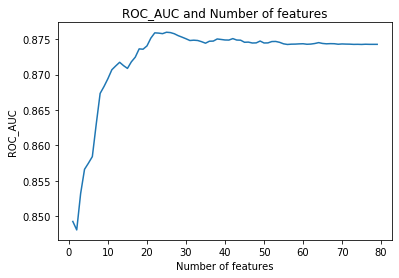

In [131]:
# Plot the ROC_AUC and the number of features
plt.plot(range(1, len(rfe_cv.grid_scores_) + 1), rfe_cv.grid_scores_)
plt.xlabel('Number of features')
plt.ylabel('ROC_AUC')
plt.title("ROC_AUC and Number of features")
plt.show()

In [132]:
# Import the required libraries.
from sklearn.feature_selection import RFE

# Create a logistic regression object.
logreg_rfe = LogisticRegression(class_weight='balanced')

# Run RFE with 20 variables as output
rfe = RFE(logreg_rfe, 20)
rfe = rfe.fit(X_train, y_train)

In [133]:
rfe.support_

array([False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False])

In [134]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 23),
 ('arpu_7', False, 8),
 ('arpu_8', False, 50),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 57),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 5),
 ('isd_og_mou_6', False, 39),
 ('isd_og_mou_7', False, 53),
 ('isd_og_mou_8', False, 28),
 ('spl_og_mou_6', False, 40),
 ('spl_og_mou_7', False, 54),
 ('spl_og_mou_8', False, 55),
 ('og_others_6', False, 33),
 ('og_others_7', False, 59),
 ('og_others_8', False, 60),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 15),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_6', False, 37),
 ('spl_ic_mou_7', False, 36),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 56),
 ('isd_ic_mou_7', False, 52),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_6', False, 45),
 ('ic_others_7', False, 42),
 ('ic_others_8', False, 41),
 ('total_rech_num_6', False, 34),
 ('total_rech_n

In [135]:
# RFE selected columns/features
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'count_rech_6', 'total_rech_amt_data_6', 'arpu_data_6'],
      dtype='object')

In [136]:
# Create a logistic regression object with rfe selected components.
logreg1 = LogisticRegression(class_weight='balanced')
logreg1.fit(X_train[rfe_col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_train_pred = logreg1.predict(X_train[rfe_col]) 
y_test_pred = logreg1.predict(X_test[rfe_col])
print(f"Accuracy of train data: {metrics.accuracy_score(y_train, y_train_pred)}")
print(f"Recall/Sensitivity of train data: {metrics.recall_score(y_train, y_train_pred)}")
print("")
print(f"Accuracy of test data: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Recall/Sensitivity of test data: {metrics.recall_score(y_test, y_test_pred)}")

Accuracy of train data: 0.7984177848988584
Recall/Sensitivity of train data: 0.8229553903345725

Accuracy of test data: 0.8003504672897196
Recall/Sensitivity of test data: 0.8136714443219405


In [138]:
results = results.append({'Model': 'Logistic Regression without PCA', 'Sensitivity' :  metrics.recall_score(y_test, y_test_pred), 
                          'Accuracy' : metrics.accuracy_score(y_test, y_test_pred)}, ignore_index=True)

## FINAL RESULTS

In [139]:
results

,Model,Sensitivity,Accuracy
0,Logistic Regression,0.803749,0.801752
1,Decision Tree,0.745314,0.714953
2,Random Forest,0.721058,0.806192
3,Logistic Regression without PCA,0.813671,0.800350


## MODEL SELECTION

<p style="font-family: Arial; font-size:1.0em;color:blue;">
1. "Logistic Regression with PCA" can be used as a predictive model compared to other tree based models because it has good sensitivity and also 30 components were sufficient to acheive this.
<br>
2. "Logistic Regression without PCA" is a good interpretable model with 82.3% sensitivity with just 20 features explaining this.

## IMPORTANT FEATURES

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above Logistic Regression model, we derive the most important features based on their  respective coefficients.

In [140]:
# Get the coefficients.
importance = logreg1.coef_[0]

In [141]:
# Create a dataframe.
df = pd.DataFrame(importance, index = X_train[rfe_col].columns, columns =['Coefficients'])
df.reindex(df.Coefficients.abs().sort_values(ascending = False).index)

,Coefficients
total_ic_mou_8,-1.580909
total_rech_num_8,-0.777763
total_og_mou_7,-0.711144
offnet_mou_7,0.693205
total_og_mou_8,-0.677091
onnet_mou_7,0.563039
onnet_mou_6,0.455570
aug_vbc_3g,-0.423208
total_og_mou_6,-0.400516
fb_user_8,-0.359293


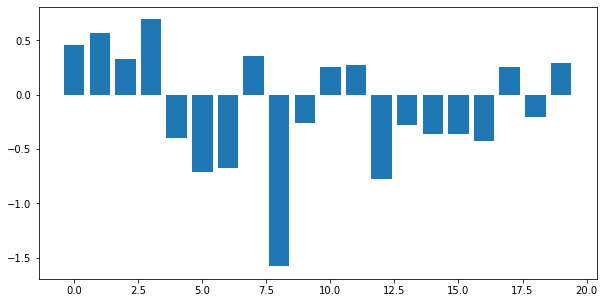

In [142]:
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> OBSERVATIONS:<br>
The top 5 important predictors in the order of their importance are below:<br>
1. total_ic_mou_8<br>
2. total_rech_num_8<br>
3. total_og_mou_7<br>
4. offnet_mou_7<br>
5. total_og_mou_8

## BUSINESS INSIGHTS

<p style="font-family: Arial; font-size:1.0em;color:blue;">
1. From the above important predictors, we can infer that decrease in total incoming calls usage during 8th month (i.e., action phase) is a key indicator that a customer is most likely to churn.<br>
2. The other important indicator of churn is the decrease in total number of recharges during action phase.<br>
3. Interestingly, the increase in offnet calls usage during 7th month is also a indication of churn.<br>
4. The decrease in total outgoing calls usage during 7th and 8th months are good indicators of churn.<br>
<br>
Hence, if the above customers are identified and appropriate action plans like improving the quality of service, discounted tariff rates, customized offers etc., could be implemented to reduce the probability of churn.